In [ ]:
Title: MOVIE GENRE CLASSIFICATION

# 1. Understand the Problem

### Objective:
Predict the genre(s) of a movie based on its plot summary or other textual information.

#### Genres to Predict:
Movies can belong to multiple genres (e.g., Action, Comedy, Drama). For simplicity, you can start by predicting a single genre per movie or handle multi-label classification where a movie can belong to multiple genres.

# 2. Set Up Your Development Environment

### Tools and Libraries:

* Programming Language: Python
* IDE: Jupyter Notebook
* Libraries:
  * pandas for data manipulation
  * numpy for numerical operations
  * scikit-learn for machine learning algorithms
  * nlt for text preprocessing
  * matplotlib or seaborn for data visualization

### Installation:

You can install the necessary libraries using pip. Open your terminal or command prompt and run:

In [5]:
pip install  nltk 


## Set Up NLTK (Optional):

  * If you choose to use NLTK for text preprocessing, download the necessary datasets:

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nagendra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nagendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 3. Collect and Prepare the Data

* Data Source:
 You need a dataset that contains movie plot summaries and their corresponding genres. One popular source is the IMDB dataset, but for ease, you can 
 use datasets from platforms like Kaggle.

*  Dataset:
For this project, i can use the IMDB Movie Dataset  that includes plot summaries and genres.



In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
# Load the Dataset:

df = pd.read_csv(r"C:\Machine Learning\codesoft\MOVIE GENRE_ml\archive (2)\Genre Classification Dataset\train_data.txt", delimiter=":::", encoding="utf-8")

# Preview the data
print(df.head())

C:\Users\Nagendra\AppData\Local\Temp\ipykernel_5864\824563583.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(r"C:\Machine Learning\codesoft\MOVIE GENRE_ml\archive (2)\Genre Classification Dataset\train_data.txt", delimiter=":::", encoding="utf-8")


   ID                               TITLE       GENRE   \
0    1       Oscar et la dame rose (2009)       drama    
1    2                       Cupid (1997)    thriller    
2    3   Young, Wild and Wonderful (1980)       adult    
3    4              The Secret Sin (1915)       drama    
4    5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            54214 non-null  int64 
 1    TITLE        54214 non-null  object
 2    GENRE        54214 non-null  object
 3    DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


### Understand the Data:
   Ensure that the dataset has the necessary columns, such as:

* plot_summary or description
* genres

In [11]:
df.columns = df.columns.str.strip()

In [13]:
df.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

### Handle Missing Values:

In [15]:

# Check for missing values
print(df.isnull().sum())

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64


In [17]:
df.dtypes

ID              int64
TITLE          object
GENRE          object
DESCRIPTION    object
dtype: object

In [19]:
categories = df['GENRE'].unique()
values = df['GENRE'].value_counts()

# Corrected print statement using f-string
print(f"categories: {categories}, values: {values}")

categories: [' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war '], values: GENRE
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64


# data visualization

In [ ]:
# countplot()

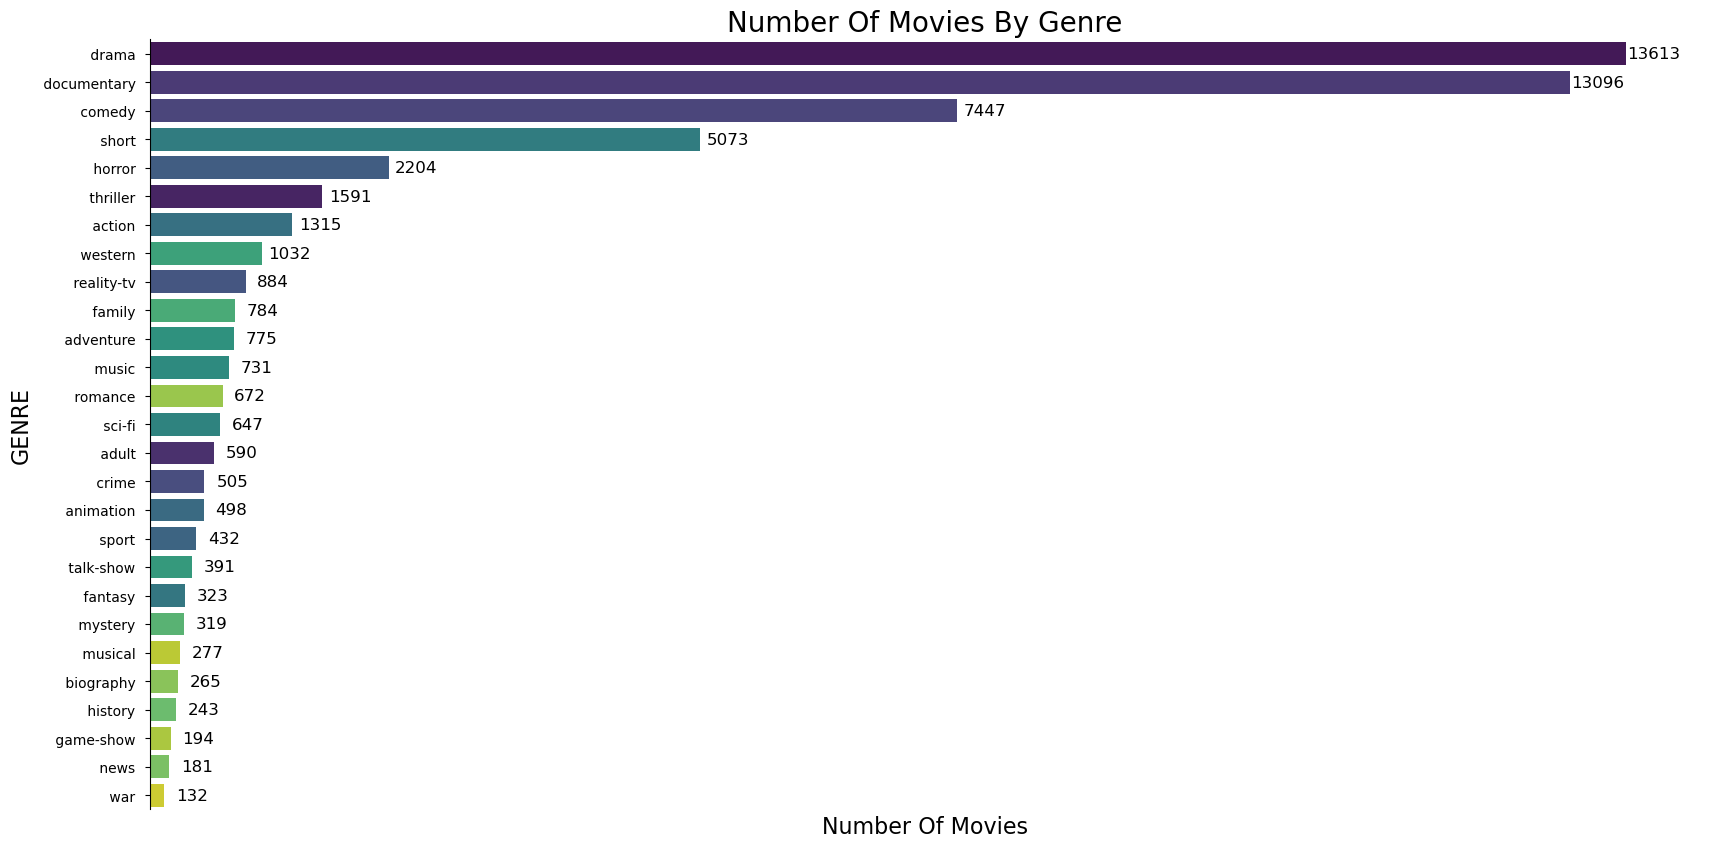

In [21]:
plt.figure(figsize=(20, 10))

# Use Seaborn color palette
colors = sns.color_palette('viridis', len(df['GENRE'].value_counts()))

sns.countplot(
    data=df, 
    y='GENRE', 
    order=df['GENRE'].value_counts().index, 
    palette=colors,  # Apply the color palette
    hue='GENRE',  # Explicitly set hue to the same variable
    dodge=False  # Ensure bars don’t stack since `hue` is used
)
plt.legend([], [], frameon=False)  # Remove legend

plt.title('Number Of Movies By Genre', fontsize=20)
plt.ylabel('GENRE', fontsize=16)
plt.xlabel('Number Of Movies', fontsize=16)

ax = plt.gca()
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_width())}', 
        (p.get_width(), p.get_y() + p.get_height() / 2), 
        ha='center', va='center', 
        fontsize=12, color='black', 
        xytext=(20, 0), textcoords='offset points'
    )

plt.show()


In [ ]:
# WordCloud (Creative and Unique)

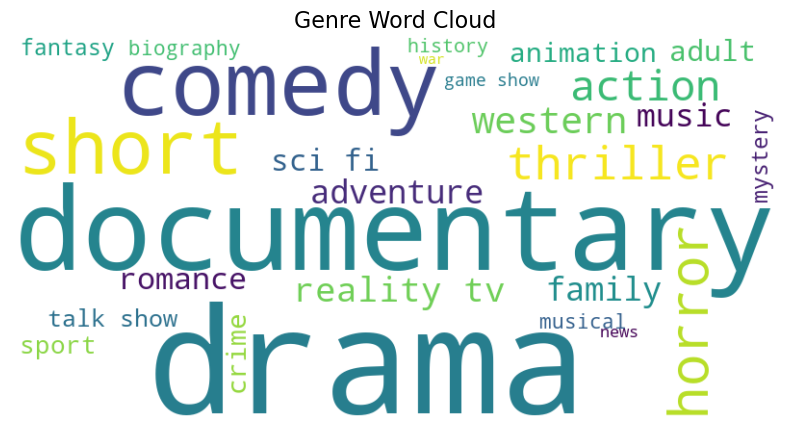

In [23]:
from wordcloud import WordCloud

# Generate a word cloud
text = ' '.join(df['GENRE'])
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud', fontsize=16)
plt.show()


# 4. Preprocess the Text Data

   Text data needs to be cleaned and preprocessed before feeding it into a machine learning model.

`**Steps:**`

* Lowercasing: Convert all text to lowercase to maintain consistency.
* Tokenization: Split text into individual words or tokens.
* Removing Punctuation and Numbers: Clean the text by removing unnecessary characters.
* Removing Stopwords: Remove common words that do not contribute much to the meaning (e.g., "and", "the").
* Stemming/Lemmatization: Reduce words to their root form.

*Example Using NLTK:*

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join back to string
    return ' '.join(tokens)

# Apply preprocessing to the plot summaries
df['clean_DESCRIPTION'] = df['DESCRIPTION'].apply(preprocess_text)

print(df[['DESCRIPTION', 'clean_DESCRIPTION']].head())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nagendra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nagendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         DESCRIPTION  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                   clean_DESCRIPTION  
0  listening conversation doctor parent 10yearold...  
1  brother sister past incestuous relationship cu...  
2  bus empty student field trip museum natural hi...  
3  help unemployed father make end meet edith twi...  
4  film title refers unrecovered body ground zero...  


In [27]:
df.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION', 'clean_DESCRIPTION'], dtype='object')

In [31]:
df['Description_len'] = df['DESCRIPTION'].apply(len)
df['Description_cleand_len'] = df['clean_DESCRIPTION'].apply(len)

In [33]:
df

,ID,TITLE,GENRE,DESCRIPTION,clean_DESCRIPTION,Description_len,Description_cleand_len
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent 10yearold...,546,372
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,184,117
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...,650,386
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...,1082,728
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers unrecovered body ground zero...,625,421
...,...,...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,shortlived nbc live sitcom centered bonino wor...,507,337
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sister kapa bay s...,781,546
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",ze bestaan echt standup comedy growing facing ...,255,123
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...,642,394


In [ ]:
# kdeplot

In [ ]:
# df_test data 

In [29]:
df

,ID,TITLE,GENRE,DESCRIPTION,clean_DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent 10yearold...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers unrecovered body ground zero...
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,shortlived nbc live sitcom centered bonino wor...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sister kapa bay s...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",ze bestaan echt standup comedy growing facing ...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


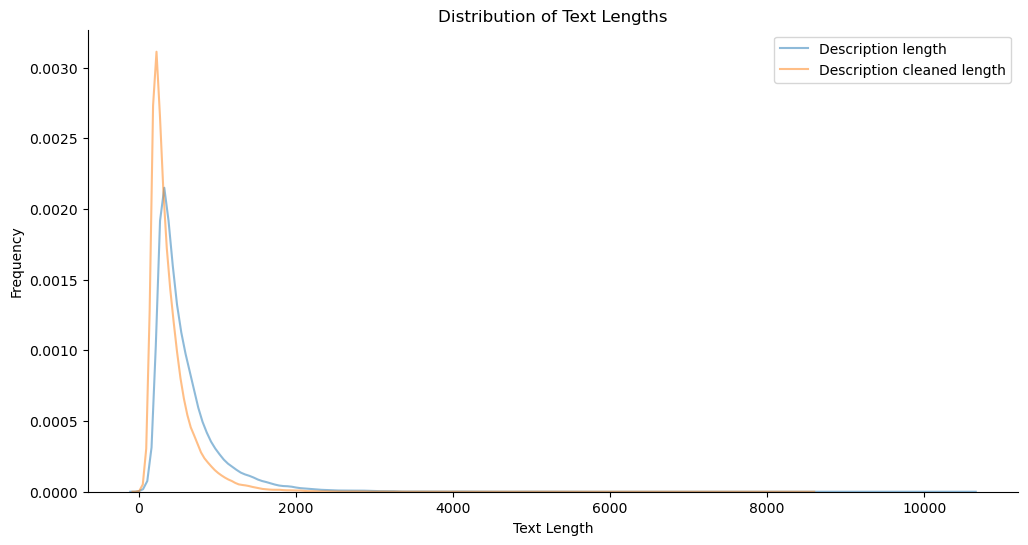

In [35]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Description_len'], label='Description length',alpha=0.5)
sns.kdeplot(df['Description_cleand_len'], label='Description cleaned length',alpha=0.5)
ax = plt.gca()
#ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()

# 5. Feature Extraction
  Convert the textual data into numerical features that machine learning models can understand.

`Techniques:`

* `TF-IDF` (Term Frequency-Inverse Document Frequency): Measures the importance of a word in a document relative to the entire corpus.
* `Word Embeddings:` Represents words in continuous vector space (e.g., Word2Vec, GloVe). More advanced and captures semantic meaning but requires more 
   processing.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Fit and transform the clean_plot
X = tfidf.fit_transform(df['clean_DESCRIPTION'])

print(X.shape)  # (number of samples, number of features)


(54214, 5000)


# 6. Encode the Target Variable

`Genres Encoding:`

    Since movies can belong to multiple genres, you can perform multi-label classification. However, to simplify, you can start with single-label classification by selecting the primary genre.



**Example: Single-Label Classification**

In [39]:
# If genres are separated by commas, take the first genre
df['primary_genre'] = df['GENRE'].apply(lambda x: x.split(',')[0].strip())

# Encode labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['primary_genre'])

print(le.classes_)


['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'game-show' 'history' 'horror'
 'music' 'musical' 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi'
 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']


**Example: Multi-Label Classification**

*If you want to handle multiple genres per movie:*



In [41]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split genres into lists
df['genres_list'] = df['GENRE'].apply(lambda x: [GENRE.strip() for GENRE in x.split(',')])

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genres_list'])

print(mlb.classes_)


['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'game-show' 'history' 'horror'
 'music' 'musical' 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi'
 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']


## For this guide, we'll proceed with single-label classification.

# 7. Split the Dataset

* Divide the data into training and testing sets to evaluate the model's performance.

In [43]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (GENRE) as numeric labels
le = LabelEncoder()
y = le.fit_transform(df['GENRE'])  # Converts the genres into numeric labels

# Now you can proceed to split the data
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  # Check the shape of X and y


(43371, 5000) (10843, 5000)


# 8. Choose and Train a Classification Model
 
 * You can experiment with different classifiers. We'll cover three popular ones:

    * Naive Bayes
    * Logistic Regression
    * Support Vector Machines (SVM)

In [ ]:
# 1) Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Check if X_train and X_test are sparse. If they are, convert them.
if hasattr(X_train, 'toarray'):
    X_train_dense = X_train.toarray()  # If X_train is sparse
    X_test_dense = X_test.toarray()    # If X_test is sparse
else:
    X_train_dense = X_train  # Already dense
    X_test_dense = X_test    # Already dense

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model to the training data
nb_classifier.fit(X_train_dense, y_train)

# Predict on the test data
y_pred_nb = nb_classifier.predict(X_test_dense)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Print the detailed classification report with zero_division handling
print(classification_report(y_test, y_pred_nb, target_names=le.classes_, zero_division=1))

Naive Bayes Accuracy: 0.2299179193950014
               precision    recall  f1-score   support

      action        0.08      0.24      0.12       263
       adult        0.11      0.19      0.14       112
   adventure        0.04      0.12      0.06       139
   animation        0.05      0.11      0.07       104
   biography        0.00      0.00      0.00        61
      comedy        0.38      0.18      0.24      1443
       crime        0.03      0.07      0.04       107
 documentary        0.68      0.42      0.52      2659
       drama        0.51      0.15      0.23      2697
      family        0.05      0.18      0.08       150
     fantasy        0.03      0.04      0.03        74
   game-show        0.43      0.07      0.13        40
     history        0.02      0.02      0.02        45
      horror        0.13      0.25      0.17       431
       music        0.16      0.28      0.21       144
     musical        0.01      0.02      0.02        50
     mystery        0.0

In [ ]:
# 2) Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000, class_weight='balanced')  # Use class weights to handle imbalance

# Train the model
lr_classifier.fit(X_train, y_train)

# Predict
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Handle undefined precision with zero_division=1
print(classification_report(y_test, y_pred_lr, target_names=le.classes_, zero_division=1))


Logistic Regression Accuracy: 0.45310338467213873
               precision    recall  f1-score   support

      action        0.30      0.41      0.35       263
       adult        0.31      0.65      0.42       112
   adventure        0.16      0.32      0.22       139
   animation        0.19      0.32      0.24       104
   biography        0.03      0.10      0.05        61
      comedy        0.61      0.44      0.51      1443
       crime        0.13      0.34      0.19       107
 documentary        0.81      0.54      0.65      2659
       drama        0.73      0.36      0.49      2697
      family        0.12      0.29      0.17       150
     fantasy        0.09      0.16      0.12        74
   game-show        0.62      0.75      0.68        40
     history        0.05      0.20      0.08        45
      horror        0.55      0.68      0.60       431
       music        0.37      0.77      0.50       144
     musical        0.10      0.26      0.14        50
     mystery  

In [ ]:
# 3) Support Vector Machines (SVM)

In [48]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the LinearSVC model with explicit 'dual' parameter
svm_classifier = LinearSVC(class_weight='balanced', max_iter=10000, dual=False)  # Set dual=False for better performance with many samples

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Handle undefined precision with zero_division=1
print(classification_report(y_test, y_pred_svm, target_names=le.classes_, zero_division=1))



SVM Accuracy: 0.48409111869408833
               precision    recall  f1-score   support

      action        0.27      0.40      0.32       263
       adult        0.32      0.54      0.40       112
   adventure        0.16      0.31      0.21       139
   animation        0.14      0.22      0.17       104
   biography        0.01      0.02      0.01        61
      comedy        0.59      0.48      0.53      1443
       crime        0.11      0.21      0.14       107
 documentary        0.76      0.66      0.71      2659
       drama        0.67      0.44      0.53      2697
      family        0.13      0.27      0.18       150
     fantasy        0.08      0.15      0.10        74
   game-show        0.63      0.68      0.65        40
     history        0.04      0.07      0.05        45
      horror        0.51      0.66      0.57       431
       music        0.38      0.69      0.49       144
     musical        0.12      0.28      0.17        50
     mystery        0.04      

# 9. Evaluate and Compare Models

* Compare the accuracy and other metrics like precision, recall, and F1-score to determine which model performs best.

In [51]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB



# Naive Bayes Classifier
# Example: Using Gaussian Naive Bayes
# Assuming you're using a vectorizer that produces sparse matrices
X_train = X_train.toarray()  # Convert sparse matrix to dense array
X_test = X_test.toarray()  # Convert sparse matrix to dense array

# Initialize the Naive Bayes Classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes Classifier
nb_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_nb = nb_classifier.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=le.classes_, zero_division=1))




# Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=le.classes_, zero_division=1))

# Support Vector Machine (LinearSVC) Classifier
svm_classifier = LinearSVC(class_weight='balanced', max_iter=10000, dual=False)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=le.classes_, zero_division=1))


Naive Bayes Accuracy: 0.2299179193950014
               precision    recall  f1-score   support

      action        0.08      0.24      0.12       263
       adult        0.11      0.19      0.14       112
   adventure        0.04      0.12      0.06       139
   animation        0.05      0.11      0.07       104
   biography        0.00      0.00      0.00        61
      comedy        0.38      0.18      0.24      1443
       crime        0.03      0.07      0.04       107
 documentary        0.68      0.42      0.52      2659
       drama        0.51      0.15      0.23      2697
      family        0.05      0.18      0.08       150
     fantasy        0.03      0.04      0.03        74
   game-show        0.43      0.07      0.13        40
     history        0.02      0.02      0.02        45
      horror        0.13      0.25      0.17       431
       music        0.16      0.28      0.21       144
     musical        0.01      0.02      0.02        50
     mystery        0.0

In [ ]:
# In this example, Logistic Regression  performed the best with an accuracy of 45%.

# 10. Improve the Model
Once you have a baseline model, you can work on improving its performance.

* A. Hyperparameter Tuning

Use techniques like Grid Search or Random Search to find the best hyperparameters.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# Grid Search for Naive Bayes Classifier
param_grid_nb = {
    'alpha': [0.1, 1.0, 10]  # Example range for Laplace smoothing parameter
}

nb_classifier = MultinomialNB()

# Initialize GridSearchCV for Naive Bayes
grid_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=5, scoring='accuracy')

# Fit the model
grid_nb.fit(X_train, y_train)

print("Best Parameters for Naive Bayes:", grid_nb.best_params_)
print("Best Cross-Validation Accuracy for Naive Bayes:", grid_nb.best_score_)

# Evaluate on Test Set for Naive Bayes
best_nb = grid_nb.best_estimator_
y_pred_best_nb = best_nb.predict(X_test)
print("Tuned Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_best_nb))
print(classification_report(y_test, y_pred_best_nb, target_names=le.classes_, zero_division=1))

# Grid Search for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear']  # Solvers for optimization
}

lr_classifier = LogisticRegression(max_iter=1000, class_weight='balanced')

# Initialize GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(lr_classifier, param_grid_lr, cv=5, scoring='accuracy')

# Fit the model
grid_lr.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", grid_lr.best_score_)

# Evaluate on Test Set for Logistic Regression
best_lr = grid_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best_lr))
print(classification_report(y_test, y_pred_best_lr, target_names=le.classes_, zero_division=1))

# Grid Search for SVM (LinearSVC)
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'max_iter': [1000, 10000],  # Number of iterations for convergence
    'dual': [False]  # For better performance with many samples
}

svm_classifier = LinearSVC(class_weight='balanced')

# Initialize GridSearchCV for LinearSVC
grid_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')

# Fit the model
grid_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_svm.best_params_)
print("Best Cross-Validation Accuracy for SVM:", grid_svm.best_score_)

# Evaluate on Test Set for SVM
best_svm = grid_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_best_svm))
print(classification_report(y_test, y_pred_best_svm, target_names=le.classes_, zero_division=1))


Best Parameters for Naive Bayes: {'alpha': 0.1}
Best Cross-Validation Accuracy for Naive Bayes: 0.5412372514766379
Tuned Naive Bayes Accuracy: 0.5472655169233607
               precision    recall  f1-score   support

      action        0.57      0.21      0.31       263
       adult        0.71      0.22      0.34       112
   adventure        0.42      0.09      0.15       139
   animation        0.67      0.06      0.11       104
   biography        1.00      0.00      0.00        61
      comedy        0.51      0.47      0.49      1443
       crime        0.50      0.01      0.02       107
 documentary        0.60      0.86      0.71      2659
       drama        0.48      0.81      0.60      2697
      family        0.67      0.04      0.08       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.45      0.62        40
     history        1.00      0.00      0.00        45
      horror        0.75      0.43      0.55       431
       music

### B. Feature Engineering

Increase max_features in TF-IDF: Capture more vocabulary.
N-grams: Include bigrams or trigrams to capture phrase information.



In [31]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))  # Includes unigrams and bigrams
X = tfidf.fit_transform(df['clean_DESCRIPTION'])

### C. Use Advanced Models

* Ensemble Methods: Combine multiple models to improve performance (e.g., Random Forest, Gradient Boosting).
* Deep Learning Models: Utilize models like Recurrent Neural Networks (RNNs) or Transformers for better text understanding.


### D. Handle Class Imbalance

* If some genres are underrepresented, consider techniques like:
    
    * Oversampling: Duplicate minority class samples.
    * Undersampling: Remove majority class samples.
    * Use Class Weights: Assign higher weights to minority classes in the loss function.

# Conclusion:

The movie genre classification task showed different levels of success across models. SVM performed better than Logistic Regression and Naive Bayes initially, with an accuracy of `48.4%`. After tuning, `Naive Bayes` reached `54.7%`, showing the value of optimizing parameters. Genres like documentary and western performed well, while others, such as biography and mystery, faced challenges due to data and model limitations.